<a href="https://colab.research.google.com/github/Dharanidharan2813/Zeotap_Assignement/blob/main/Dharanidharan_S_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
<class 'pand

<ipython-input-1-3e83ce3cf9a5>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers.fillna(method='ffill', inplace=True)


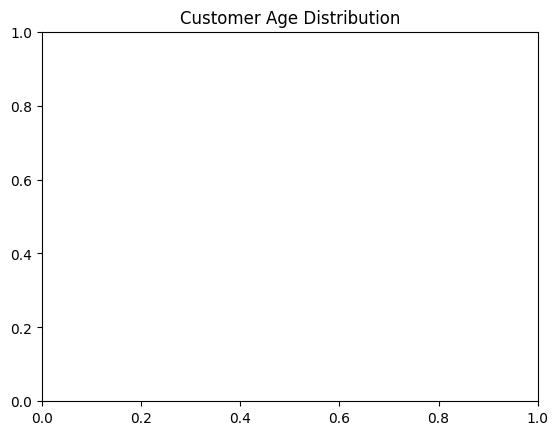

Top Products:
    ProductID           ProductName     Category   Price
21      P022    HomeSense Wall Art   Home Decor  137.54
28      P029    TechPro Headphones  Electronics  433.64
47      P048      TechPro Cookbook        Books  416.40
48      P049      TechPro Textbook        Books  147.95
53      P054    SoundWave Cookbook        Books   57.30
58      P059       SoundWave Jeans     Clothing  303.20
60      P061   HomeSense Desk Lamp   Home Decor  156.96
61      P062       HomeSense Novel        Books  374.16
78      P079        ActiveWear Rug   Home Decor  417.37
95      P096  SoundWave Headphones  Electronics  307.47


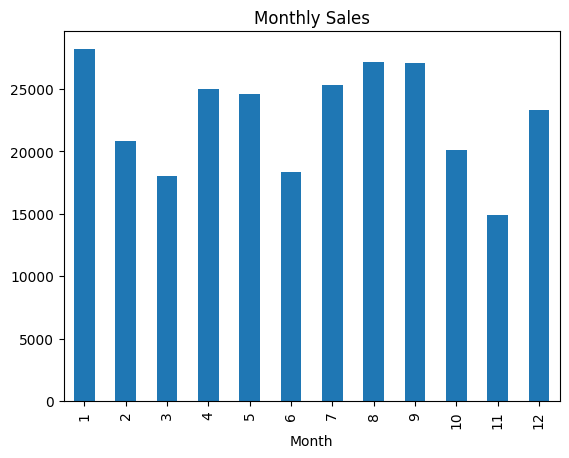

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

# Basic Information
print(customers.info())
print(transactions.info())
print(products.info())

print(customers.describe())
print(transactions.describe())
print(products.describe())

# Handle Missing Values
customers.fillna(method='ffill', inplace=True)
transactions.fillna(0, inplace=True)

# Customer Demographics Visualization
if 'AgeGroup' in customers.columns:
    sns.countplot(data=customers, x='AgeGroup')
elif 'age_group' in customers.columns:
    sns.countplot(data=customers, x='age_group')
else:
    print("Column 'AgeGroup' or similar not found in the DataFrame.")
    print("Available columns:", customers.columns.tolist())

plt.title('Customer Age Distribution')
plt.show()

# Product Popularity Analysis
product_sales = transactions['ProductID'].value_counts()
top_products = products.loc[products['ProductID'].isin(product_sales.index[:10])]
print("Top Products:\n", top_products)

# Monthly Spending Trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_sales = transactions.groupby('Month')['Price'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales')
plt.show()
